In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from cms_top_20_001_Limits import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

In [2]:
recastData = pd.read_pickle('./pp2tt_formFactors_scan.pcl')

In [3]:
recastData0 = pd.read_pickle('./pp2tt_formFactors_scan_good.pcl')


In [4]:
recastData[['mST','mChi','yDM (95% C.L.)']]

,mST,mChi,yDM (95% C.L.)
0,300.0,5.0,4.319038
1,300.0,50.0,4.423537
2,300.0,100.0,4.737764
3,300.0,150.0,5.128766
4,300.0,200.0,5.553127
...,...,...,...
202,3000.0,2900.0,48.925261
203,3000.0,2925.0,48.986216
204,3000.0,2950.0,49.073446
205,3000.0,2975.0,49.106000


In [5]:
recastData0[['mST','mChi','yDM (95% C.L.)']]

,mST,mChi,yDM (95% C.L.)
0,300.0,5.0,5.076008
1,300.0,50.0,5.172954
2,300.0,100.0,5.544008
3,300.0,150.0,5.945232
4,300.0,200.0,6.459329
...,...,...,...
202,3000.0,2900.0,51.916696
203,3000.0,2925.0,51.944349
204,3000.0,2950.0,52.016895
205,3000.0,2975.0,52.024137


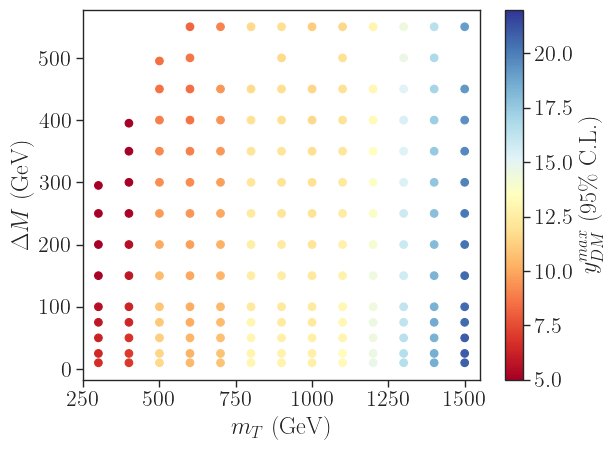

In [6]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

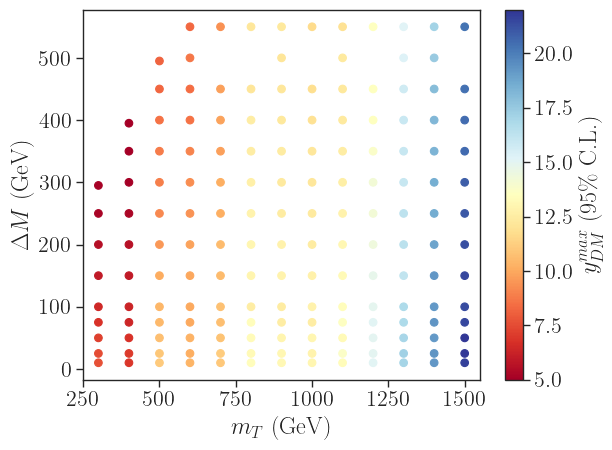

In [7]:
x = recastData0['mST']
y = recastData0['mChi']
dm = x-y
z = recastData0['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

In [8]:
recastData.iloc[1].T

model                                                Top-FormFactorsOneLoop-UFO
mST                                                                       300.0
mChi                                                                       50.0
mT                                                                        172.5
yDM                                                                         1.0
process                                  $g g \to \bar{t} t$$q q \to \bar{t} t$
xsec (pb)                                                             -0.006853
MC Events                                                                150000
file                          ../../processFolders/gg2tt_formFactors_scan/Ev...
bin_250_400                                                           -0.030563
bin_250_400_Error                                                      0.000878
bin_400_480                                                           -0.033191
bin_400_480_Error                       

In [9]:
recastData0.iloc[1].T

model                                                Top-FormFactorsOneLoop-UFO
mST                                                                       300.0
mChi                                                                       50.0
mT                                                                        172.5
yDM                                                                         1.0
process                                  $g g \to \bar{t} t$$q q \to \bar{t} t$
xsec (pb)                                                             -0.006853
MC Events                                                                150000
file                          ../../processFolders/gg2tt_formFactors_scan/Ev...
bin_250_400                                                           -0.030563
bin_250_400_Error                                                      0.000878
bin_400_480                                                           -0.033191
bin_400_480_Error                       

In [10]:
red = recastData[1:2]

In [11]:
red

,model,mST,mChi,mT,yDM,process,xsec (pb),MC Events,file,bin_250_400,...,bin_1500_1700,bin_1500_1700_Error,bin_1700_2000,bin_1700_2000_Error,bin_2000_2300,bin_2000_2300_Error,bin_2300_3500,bin_2300_3500_Error,yDM (95% C.L.),$\Delta \chi^2$ (95% C.L.)
1,Top-FormFactorsOneLoop-UFO,300.0,50.0,172.5,1.0,$g g \to \bar{t} t$$q q \to \bar{t} t$,-0.006853,150000,../../processFolders/gg2tt_formFactors_scan/Ev...,-0.030563,...,-0.000481,0.000006,-0.000332,0.000004,-0.000138,0.000002,-0.000102,9.751866e-07,4.423537,3.84


In [12]:
# ### Load CMS data
xsecsObs,covMatrix = read_CMSdata()
# ### Load SM prediction (LO)
smLO = getSMLO()
# ### Load k-factors
kfac = getKfactor()
sm = kfac*smLO


In [13]:
 binCols = [c for c in red.columns 
               if 'bin_' in c.lower() and not 'error' in c.lower()]
bins_left = np.array([eval(c.split('_')[1]) for c in binCols])
bins_right = np.array([eval(c.split('_')[2]) for c in binCols])               

In [14]:
signal = list(zip(bins_left,red.iloc[0][binCols].values))
signal = np.array(sorted(signal))[:,1]

In [15]:
signal = kfac*signal

In [16]:
signal = signal/bin_widths
sm = sm/bin_widths

In [17]:
def chi2b(yDM,signal,sm,data,covmat):
    theory = (sm + yDM**2*signal)
    diff = (theory - data)
    Vinv = np.linalg.inv(covmat)
    return ((diff).dot(Vinv)).dot(diff)

In [18]:
#First find minima of the chi profile, such that the delta chi2 can then be calculated
def func_to_solve_deltachi2(yDMval):
    return chi2(yDMval, signal, sm, xsecsObs, covMatrix)

yDMmin = minimize(func_to_solve_deltachi2, x0=20).x
chi2min = chi2(yDMmin, signal, sm, xsecsObs, covMatrix)

def func_to_solve_95(yDMval):
    return chi2(yDMval, signal, sm, xsecsObs, covMatrix) - chi2min - 3.84

In [19]:
yDM95 = brentq(func_to_solve_95, a=1000,b=yDMmin)
print(chi2min,yDMmin,yDM95)

41.66309514042941 [3.06345045] 4.423536577538813


In [20]:

#First find minima of the chi profile, such that the delta chi2 can then be calculated
def func_to_solve_deltachi2b(yDMval):
    return chi2b(yDMval, signal, sm, xsecsObs, covMatrix)

yDMminb = minimize(func_to_solve_deltachi2b, x0=20).x
chi2minb = chi2b(yDMminb, signal, sm, xsecsObs, covMatrix)

def func_to_solve_95b(yDMval):
    return chi2b(yDMval, signal, sm, xsecsObs, covMatrix) - chi2minb - 3.84

In [21]:
yDM95b = brentq(func_to_solve_95b, a=1000,b=yDMminb)
print(chi2minb,yDMminb,yDM95b)

41.66309514042941 [3.06345045] 4.423536577538813


In [22]:
yDMvals = np.linspace(0.,10.,100)
c2 = np.array([chi2(y, signal, sm, xsecsObs, covMatrix) for y in yDMvals])
c2b = np.array([chi2b(y, signal, sm, xsecsObs, covMatrix) for y in yDMvals])

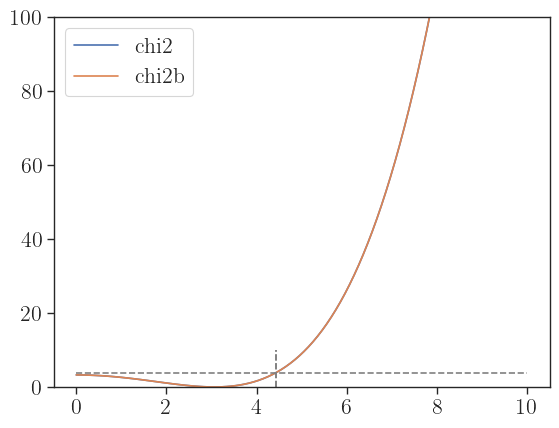

In [23]:
plt.plot(yDMvals,c2-chi2min,label='chi2')
plt.plot(yDMvals,c2b-chi2minb,label='chi2b')
plt.hlines(y=3.84,xmin=yDMvals.min(),xmax=yDMvals.max(),linestyles='dashed',colors='gray')
plt.vlines(x=yDM95,ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.vlines(x=yDM95b,ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.legend()
plt.ylim(0,100)
plt.show()